In [18]:
import numpy as np
from numpy import pi
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit import QuantumRegister, ClassicalRegister
from qiskit import execute

In [19]:
def qft_rotations(circuit, n):
    """Performs qft on the first n qubits in circuit (without swaps)"""
    if n == 0:
        return circuit
    n -= 1
    circuit.h(n)
    for qubit in range(n):
        circuit.cp(pi/2**(n-qubit), qubit, n)
    # Al final de nuestra función, llamamos a la misma función de nuevo en
    # los siguientes qubits (reducimos n en uno antes en la función)
    qft_rotations(circuit, n)



In [20]:
def swap_registers(circuit, n):
    for qubit in range(n//2):
        circuit.swap(qubit, n-qubit-1)
    return circuit

def qft(circuit, n):
    """QFT on the first n qubits in circuit"""
    qft_rotations(circuit, n)
    swap_registers(circuit, n)
    return circuit


# Estado |100>

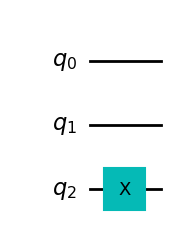

In [21]:
# El estado de entrada 
qc = QuantumCircuit(3)

# Codificando en el circuito el estado |100>
#qc.x(0)
qc.x(2)
qc.draw()

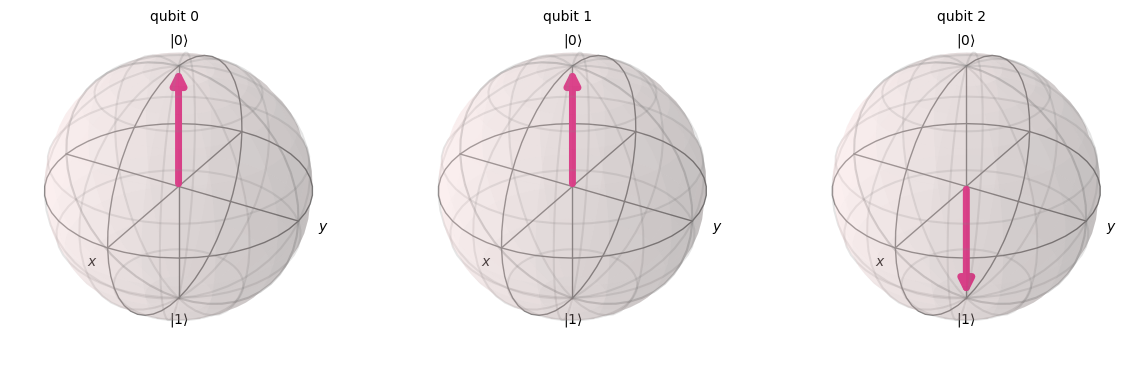

In [22]:
# Estado entrante, 
sim = Aer.get_backend("aer_simulator")# Funcion de simuacion grafica del estado
qc_init = qc.copy()
qc_init.save_statevector()
statevector = sim.run(qc_init).result().get_statevector()
plot_bloch_multivector(statevector)

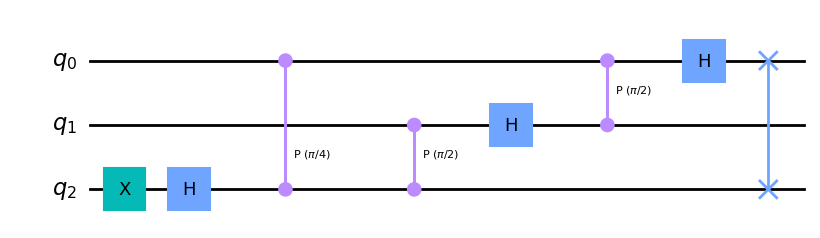

In [23]:
qft(qc,3)
qc.draw()

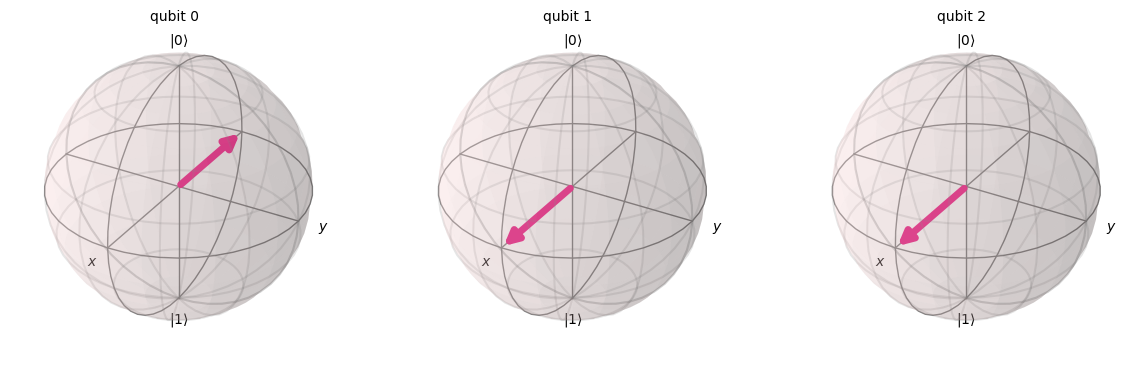

In [24]:
# Resultado Grafico de la aplicación del aalgoritmo de Fourier sobre el estado entrante
qc.save_statevector()
statevector = sim.run(qc).result().get_statevector()
plot_bloch_multivector(statevector)

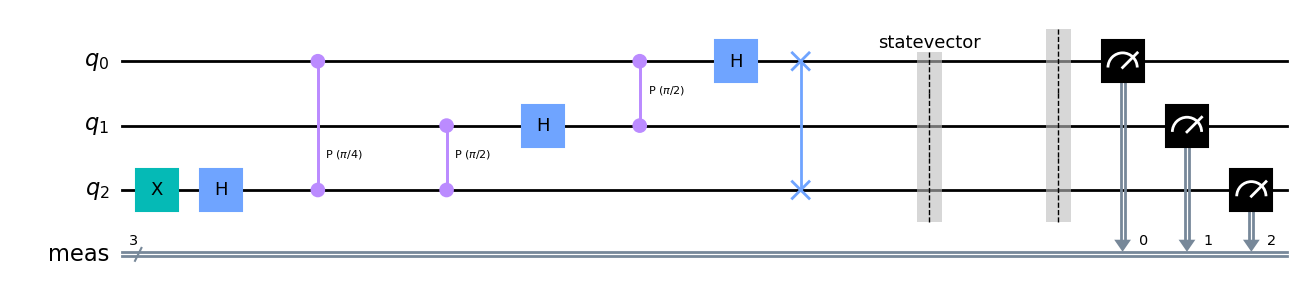

In [25]:
qc.measure_all()
qc.draw()

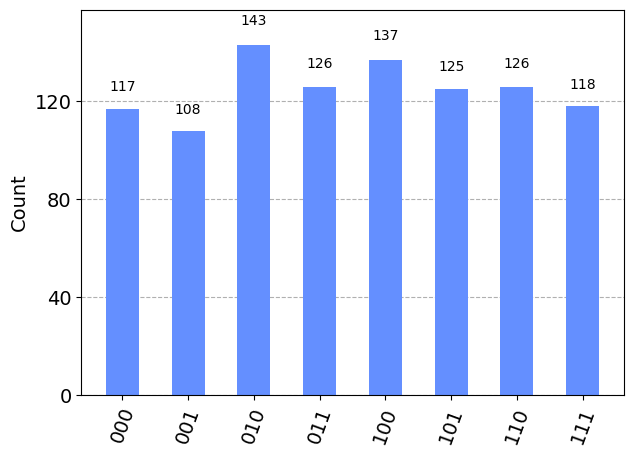

In [44]:
qasm_simulator = Aer.get_backend('qasm_simulator')
job = execute(qc, qasm_simulator, shots = 1000)
counts = job.result().get_counts(qc)
plot_histogram(counts)

In [37]:
# def inverse_qft(circuit, n):
#     """Does the inverse QFT on the first n qubits in circuit"""
#     qft_circ = qft(QuantumCircuit(n), n)
#     invqft_circ = qft_circ.inverse()
#     circuit.append(invqft_circ, circuit.qubits[:n])
#     return circuit.decompose() # .decompose() allows us to see the individual gates

In [28]:
# inverse_qft(qc, 3)
# qc.measure_all()
# qc.draw()

In [ ]:
# qasm_simulator = Aer.get_backend('qasm_simulator')

# job = execute(qc, qasm_simulator, shots = 1000)
# counts = job.result().get_counts(qc)

# plot_histogram(counts)

# Estado |011>

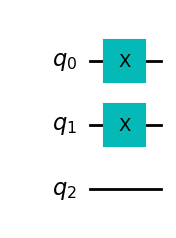

In [30]:
qc2 = QuantumCircuit(3)

# Codificando en el circuito el estado |011>
qc2.x(0)
qc2.x(1)
qc2.draw()

In [31]:
qft(qc2,3)

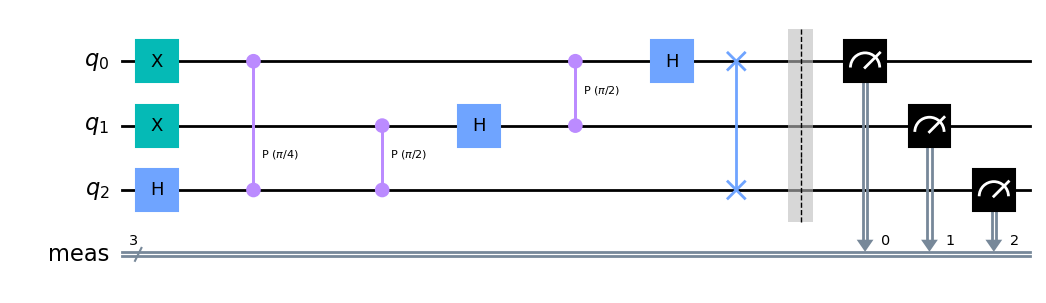

In [32]:
qc2.measure_all()
qc2.draw()

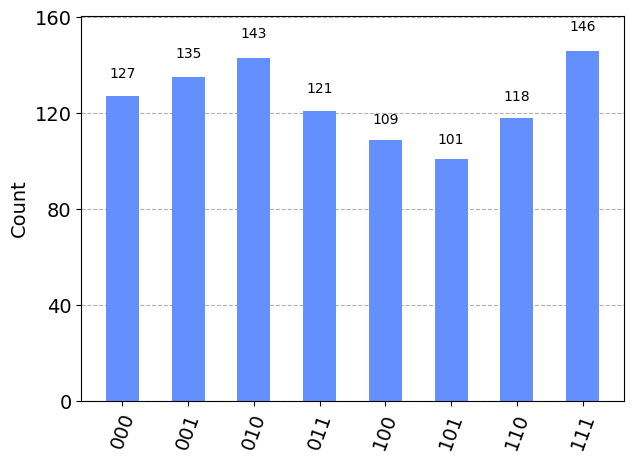

In [49]:
qasm_simulator3 = Aer.get_backend('qasm_simulator')
job3 = execute(qc2, qasm_simulator3, shots = 1000)
counts3 = job3.result().get_counts(qc2)
plot_histogram(counts3)